<a href="https://colab.research.google.com/github/Vamsee27/Applied-ML/blob/main/Earthquake_data_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits import basemap
import geopandas as gpd
from shapely.geometry import Point, Polygon

#Loading Dataset and World shape

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [6]:
df = pd.read_csv("co-ordinates.csv");

In [12]:
df.head()

,latitude,longitude,depth,mag,id,hour,date
0,34.189835,-117.58800,6.000,1.70,ci12317071,0.0,1973-01-01
1,-9.214000,150.63400,41.000,5.30,usp0000001,3.0,1973-01-01
2,48.308666,-122.11733,13.680,2.20,uw10840118,4.0,1973-01-01
3,-15.012000,-173.95800,33.000,5.00,usp0000002,5.0,1973-01-01
4,19.443666,-155.36084,7.302,1.85,hv19723167,7.0,1973-01-01


#Plotting Earthquake affected areas on the World Map

In [19]:
#world.to_crs(epsg=4326).plot()
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Earthquake Affected Areas as per Dataset')

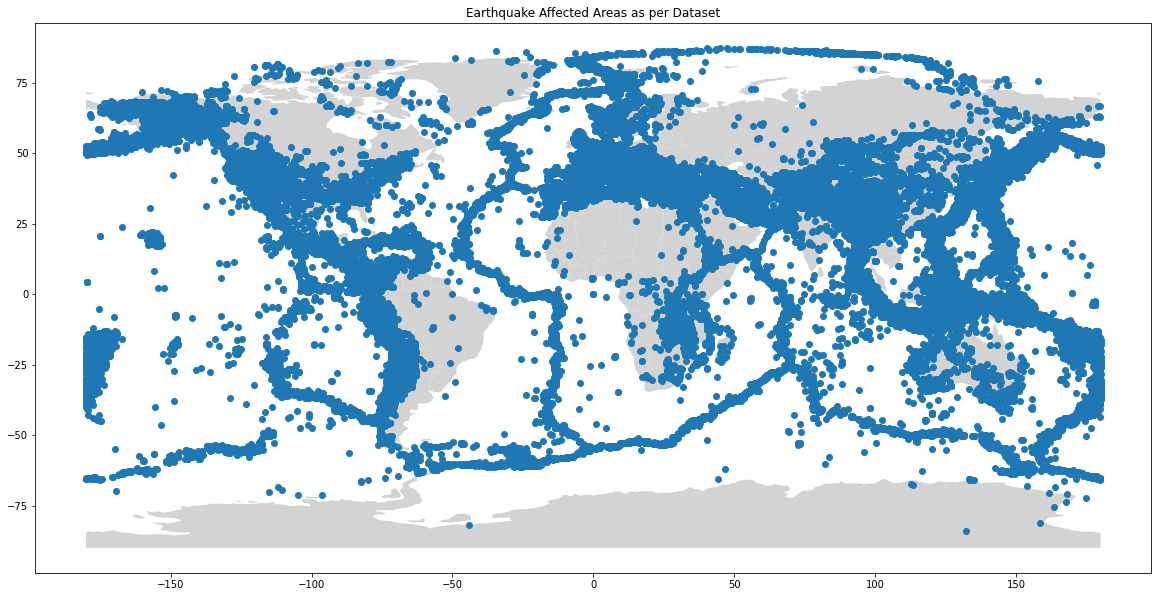

In [22]:
fig, ax = plt.subplots(figsize = (20,20))
world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
ax.set_title('Earthquake Affected Areas as per Dataset')